In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

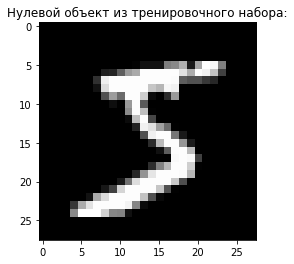

In [11]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

In [12]:
dim = 784 # 28*28
X_train = X_train.reshape(len(X_train), dim)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=44, svd_solver='full')
modelPCA = pca.fit(X_train)
print(np.cumsum(pca.explained_variance_ratio_))
X_train = modelPCA.transform(X_train)

[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=45)

In [16]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [20]:
svm = SVC(probability=True)
clf = svm.fit(X_train, y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
SVC_M = confusion_matrix(y_test, y_pred)
SVC_M

array([[1163,    0,    0,    0,    1,    0,    2,    0,    2,    2],
       [   0, 1348,    4,    0,    1,    0,    0,    2,    1,    1],
       [   1,    0, 1184,    1,    3,    0,    0,    5,    1,    2],
       [   0,    0,   11, 1148,    0,   12,    0,    1,    8,    4],
       [   1,    2,    2,    1, 1113,    0,    3,    1,    2,   11],
       [   1,    1,    2,    6,    4, 1020,    6,    0,    6,    1],
       [   0,    0,    0,    0,    3,    5, 1160,    0,    2,    0],
       [   1,    3,    7,    0,    4,    0,    0, 1264,    1,    9],
       [   1,    6,    2,    2,    1,    4,    3,    0, 1213,    2],
       [   3,    1,    0,    5,   17,    2,    0,    7,    3, 1178]],
      dtype=int64)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
clf = rfc.fit(X_train, y_train)
y_pred = clf.predict(X_test)

RFC_M = confusion_matrix(y_test, y_pred)
RFC_M

array([[1151,    0,    3,    1,    2,    3,    8,    0,    2,    0],
       [   0, 1327,   13,    6,    0,    2,    5,    0,    3,    1],
       [   3,    0, 1142,   12,   12,    1,    3,    7,   15,    2],
       [   3,    1,   14, 1094,    2,   22,    4,    7,   28,    9],
       [   2,    5,    6,    2, 1076,    3,    8,    1,    7,   26],
       [   3,    1,    4,   18,   11,  986,   14,    1,    7,    2],
       [   7,    1,    2,    0,    4,   14, 1139,    0,    3,    0],
       [   0,    6,   13,    1,   13,    4,    0, 1229,    3,   20],
       [   2,   11,    8,   29,    8,   22,    6,    0, 1134,   14],
       [   3,    2,    3,   22,   32,    5,    1,   20,    6, 1122]],
      dtype=int64)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
clf = dtc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
DTC_M = confusion_matrix(y_test, y_pred)
DTC_M

array([[1040,    2,   16,   10,    9,   25,   33,    4,   19,   12],
       [   2, 1290,   15,    8,    7,    6,   13,    6,    7,    3],
       [  14,   15,  978,   21,   20,   25,   30,   31,   50,   13],
       [  11,    6,   32,  935,    4,   80,   11,   14,   66,   25],
       [  12,    9,   18,    5,  908,   16,   19,   29,   26,   94],
       [  33,    6,   19,   55,   17,  800,   31,   16,   43,   27],
       [  21,    2,   17,    6,   17,   18, 1070,    4,   11,    4],
       [   3,   10,   23,   20,   23,   19,    4, 1106,   16,   65],
       [  20,   17,   67,   61,   20,   67,   13,   15,  924,   30],
       [  10,    5,   12,   24,  103,   25,    3,   63,   23,  948]],
      dtype=int64)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_pred = clf.predict(X_test)
LR_M = confusion_matrix(y_test, y_pred)
LR_M

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1129,    1,    1,    0,    2,   15,    8,    1,    9,    4],
       [   0, 1313,    5,    8,    0,    8,    1,    3,   18,    1],
       [   6,   15, 1046,   20,   29,    5,   25,   10,   35,    6],
       [   4,   10,   23, 1007,    1,   56,    8,   16,   41,   18],
       [   4,    9,    7,    4, 1037,    3,   10,    1,   13,   48],
       [   8,   10,   12,   44,   12,  866,   28,    9,   35,   23],
       [   9,    3,   10,    0,   15,   26, 1094,    3,   10,    0],
       [   1,   11,   17,    3,   15,    3,    0, 1188,    5,   46],
       [  10,   39,   11,   39,    2,   41,   11,    6, 1063,   12],
       [   6,    9,    8,   22,   48,   10,    1,   43,    8, 1061]],
      dtype=int64)

In [40]:
clf = neigh.fit(X_train, y_train)
y_pred = clf.predict(X_test)
KNN_M = confusion_matrix(y_test, y_pred)
KNN_M

array([[1165,    0,    1,    1,    0,    0,    2,    0,    0,    1],
       [   0, 1349,    3,    0,    1,    1,    0,    1,    1,    1],
       [   3,    2, 1172,    1,    1,    0,    1,    9,    6,    2],
       [   0,    1,   14, 1131,    0,   15,    0,    2,   16,    5],
       [   2,    4,    1,    0, 1106,    0,    2,    3,    1,   17],
       [   1,    0,    0,   11,    1, 1010,   14,    0,    1,    9],
       [   4,    0,    1,    0,    1,    4, 1158,    0,    2,    0],
       [   0,    6,    5,    0,    0,    0,    0, 1262,    2,   14],
       [   3,    6,    2,   12,    3,    7,    3,    0, 1191,    7],
       [   3,    1,    1,    4,   18,    0,    0,   16,    3, 1170]],
      dtype=int64)

In [ ]:
SVC_M - KNN_M

In [ ]:
for i in range(10):
    print("точность " + str(i) + " \t SVM = " + str(SVC_M[i][i] / np.sum(SVC_M[i])) + " \t KNN = " + str(KNN_M[i][i] / np.sum(KNN_M[i])))